# Datenanalyse mit KI & Machine Learning
## Klassifikation mit KNN

<h3>KNN steht für <b>k-nächste Nachbarn</b><br></h3>
<p>Es handelt sich hierbei um keine Regression, bei der Werte ausgerechnet werden, sondern um <b>Klassifikation</b>, bei der Entitäten (Zeilen) passende Klassen (Werte aus y) zugeordnet werden.</p>
<p>Die Zugehörigkeit von Punkten zu Klassen und damit zu Clustern wird über eine
gewisse Anzahl von Nachbarn aus einer Klasse gesteuert.</p>
<p>Sagen wir, dass z.B. die 3 nächsten Nachbarn die Zugehörigkeit bestimmen,
dann wird unser Modell bei jedem Punkt schauen, welches die nächsten drei Punkte sind
und je nach ihrer Klassenzugehörigkeit dem aktuellen Punkt ein Label verpassen.</p>

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
    classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd

In [143]:
# Mit make_classification erstellen wir Daten, die eine gewählte Anzahl Cluster
# enthalten

In [144]:
# Fall 1: Klar getrennte Cluster erzeugen (und danach mit KNN finden):
X, y = make_classification(
    n_samples=200,     # Stichprobengröße
    n_features=2,      # Anzahl der Variablen
    n_informative=2,   # Anzahl bedeutsamer Variablen
    n_redundant=0,     # Anzahl redundanter Variablen (kein Beitrag zu Clustern)
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=3,
    random_state=42
)

In [145]:
# Datenpunkte:
X

array([[ 1.12707102,  2.013042  ],
       [ 3.31293463,  4.77053357],
       [ 4.34042818,  4.42099601],
       [ 4.29454774,  1.59561981],
       [ 2.94410516,  2.4772409 ],
       [-2.11959689,  2.50891314],
       [ 2.1510847 ,  2.81007677],
       [-2.00745441,  1.54715744],
       [-3.25396925,  2.06769236],
       [-2.24392415,  3.19979806],
       [-3.9208928 ,  4.9189499 ],
       [-1.51193731,  5.50578584],
       [ 4.25751204,  3.81515089],
       [-5.12190908,  2.62220145],
       [ 3.87768113,  2.51095984],
       [-1.53214458,  2.7871928 ],
       [ 2.48404809,  2.04843842],
       [-2.54235518,  5.49536942],
       [ 3.04235818,  3.10204918],
       [ 3.63367133,  2.59219328],
       [ 3.85756778,  3.7382647 ],
       [-4.41167954,  1.19379086],
       [ 2.87481918,  2.48815664],
       [-1.90470998,  2.57526555],
       [-3.64994223,  1.93304083],
       [ 1.34754651,  1.80841051],
       [ 4.10252081,  4.34684404],
       [ 4.9574463 ,  4.01418031],
       [-3.70056309,

In [146]:
# Klassenzugehörigkeiten
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

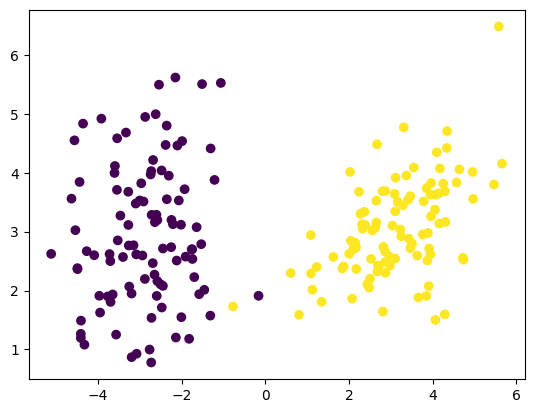

In [147]:
# Lasst uns zunächst die "Wahrheit" plotten, also die Datenpunkte mit 
# der Klasse, der sie in y zugeordnet werden (0 oder 1):

plt.scatter(X[:, 0],
            X[:, 1],
            c=y);

In [148]:
# Aufsplitten in Trainings- und Testdaten (Validierung sparen wir uns)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [149]:
# KNN-Modell instantiieren (ein Objekt der Klasse erstellen)
# (Mit Hyperparameter n_neighbors standardmäßig auf 5 eingestellt)
knn = KNeighborsClassifier()

In [150]:
# Modell an Trainingsdaten trainieren:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
# Treffergenauigkeit (accuracy) bestimmen anhand des Testdatensatzes
# Sprich: Wie viele der Vorhersagen waren korrekt?
knn_score = knn.score(X=X_test, y=y_test)
print(f'Accuracy bei Testdaten in Höhe von: {knn_score:.3f}')

Accuracy bei Testdaten in Höhe von: 1.000


In [152]:
# Anschauen, wie die vorhergesagten Cluster aussehen:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

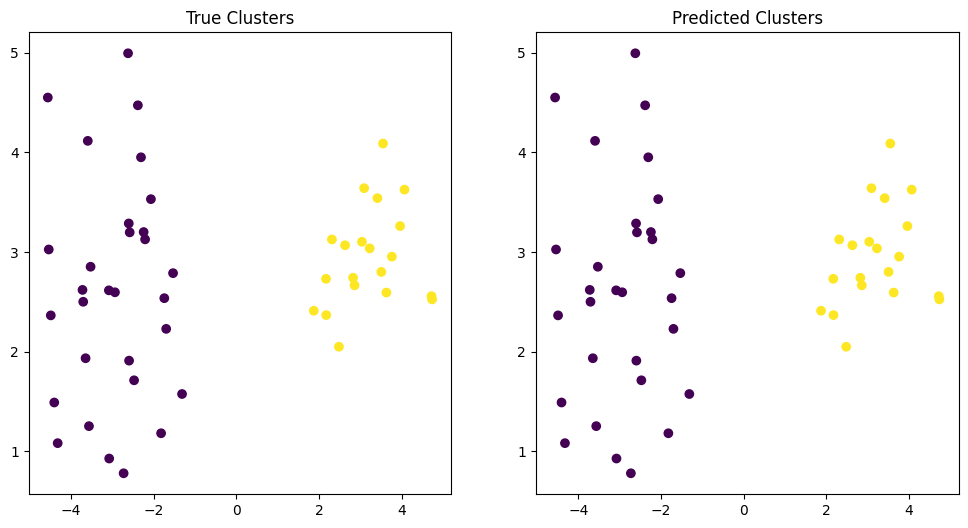

In [153]:
# Wahrheit und Vorhersage nebeneinander plotten:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_test)
ax1.set(title='True Clusters')
ax2.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters');

In [154]:
# Fazit: Ja, in diesem einfachen Fall war es tatsächlich möglich, alle Punkte
# korrekt zu bestimmen.

In [155]:
# Fall 2: Cluster mit Überschneidungen erzeugen (und danach mit KNN finden):
X, y = make_classification(
    n_samples=200,  # Stichprobengröße
    n_features=2,  # Anzahl der Variablen
    n_informative=2,  # Anzahl bedeutsamer Variablen
    n_redundant=0,  # Anzahl redundanter Variablen (kein Beitrag zu Clustern)
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
    class_sep=1.7
)

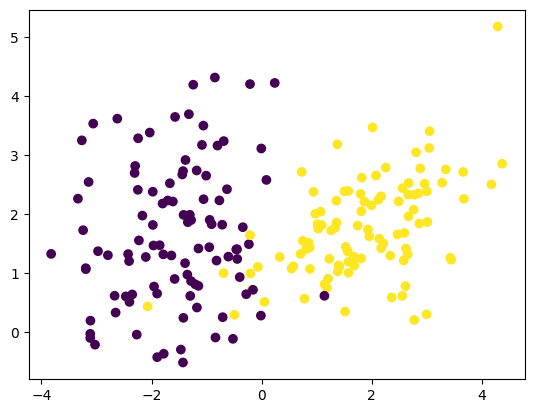

In [156]:
# Zunächst wieder der Plot der "wahren" Cluster (mit Labels):
plt.scatter(X[:, 0],
            X[:, 1],
            c=y);

In [157]:
# Quizfrage: Wird hier KNN funktionieren?

In [180]:
# Aufsplitten in Trainings- und Testdaten (Validierung sparen wir uns noch):
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [181]:
# Modelltraining:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [182]:
# Modell-Performance:
knn_score = knn.score(X=X_test, y=y_test)
print(f'Accuracy bei Testdaten in Höhe von: {knn_score:.3f}')

Accuracy bei Testdaten in Höhe von: 0.960


In [183]:
# Predictions als Array generieren:
y_pred = knn.predict(X_test)

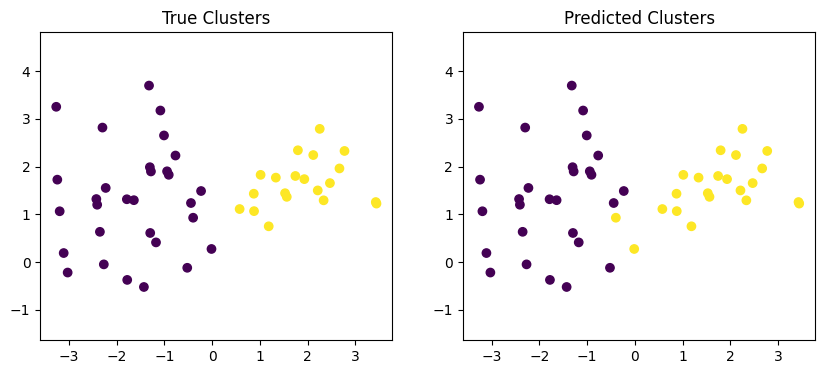

In [186]:
# Plotten von Testdaten mit Labels vs. Predictions:
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_test)
ax1.set(title='True Clusters')
ax1.axis('equal')
ax2.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters')
ax2.axis('equal');

In [ ]:
# Quizfrage: Warum sind die beiden Punkte bei Predictions gelb?
# Tipp: default values

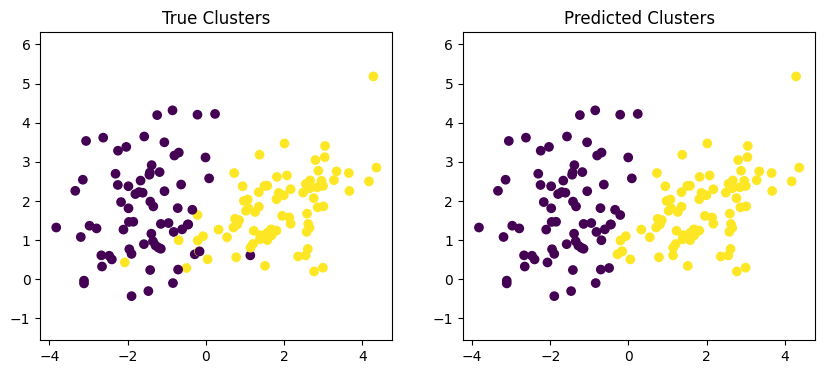

In [188]:
# Wie sieht das Clustering der Testdaten aus? 
# Plotten von Testdaten mit Labels vs. Predictions:

y_pred = knn.predict(X_train)

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_train)
ax1.set(title='True Clusters')
ax1.axis('equal')
ax2.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters')
ax2.axis('equal');

In [ ]:
# Mit Hyperparametern spielen. 
# Was für ein Ergebnis gibt es, wenn nur 2 nächste Nachbarn die Clusterzugehörigkeit bestimmen? 

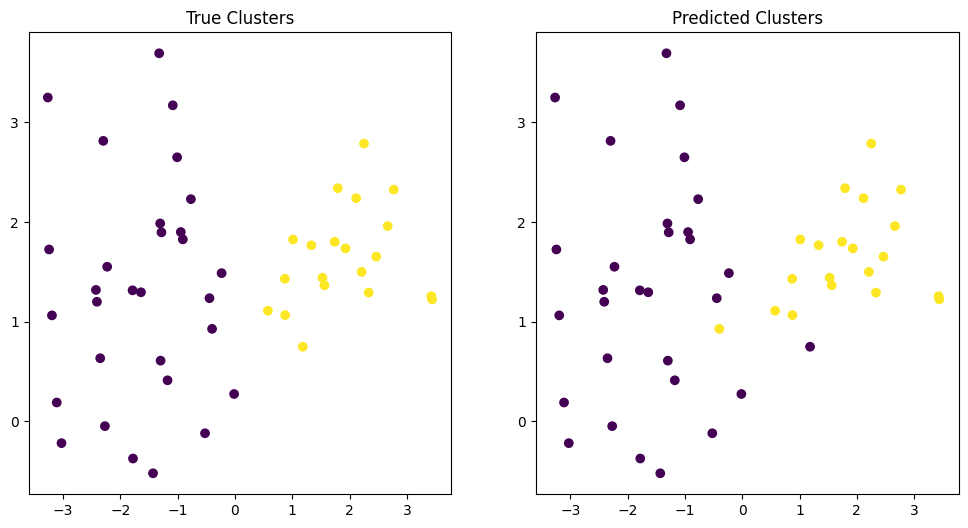

In [193]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_test)
ax1.set(title='True Clusters')
ax2.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters');

In [ ]:
# Quizfrage: Was ist denn hier passiert?
# Unten links ist die Nachbarschaft doch ganz "klar"!

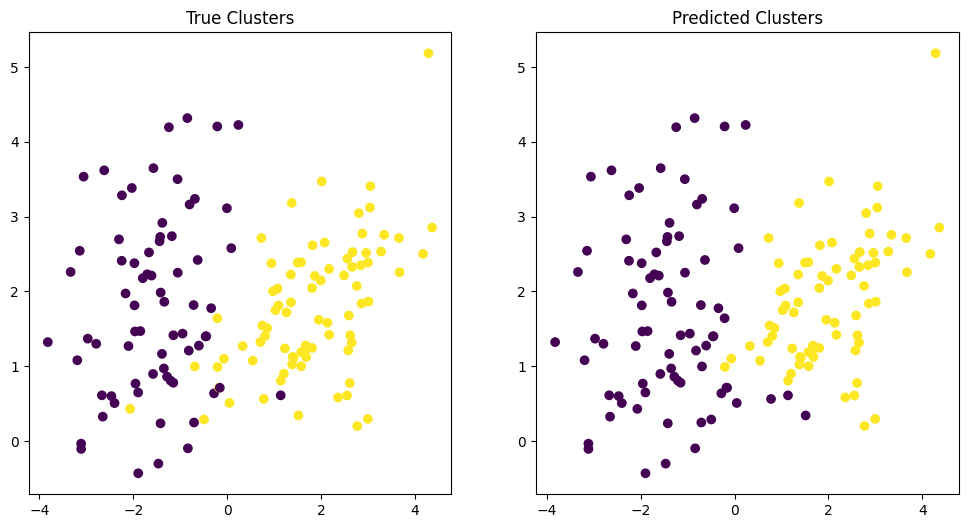

In [192]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_train)
ax1.set(title='True Clusters')
ax2.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters');

In [ ]:
# Das Modell hat von den Trainingsdaten und nicht von den Testdaten gelernt.
# Es wird immer Punkte nach ihrer Nähe zu Punkten bestimmen, wie sie in den Trainingsdaten
# vorlagen!

In [ ]:
# Bei welchem n macht unser Modell die beste Arbeit? (bzw. hat es die geringste Fehlerrate)
# Gridsearch mit for-Schleife 

In [203]:
# Eigener Gridsearch mit For-Schleife
# Training mit verschiedenen k's und Vergleich der Fehlerraten
error_rates = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    error_rate = 1 - knn.score(X_test, y_test)
    error_rates.append(error_rate)

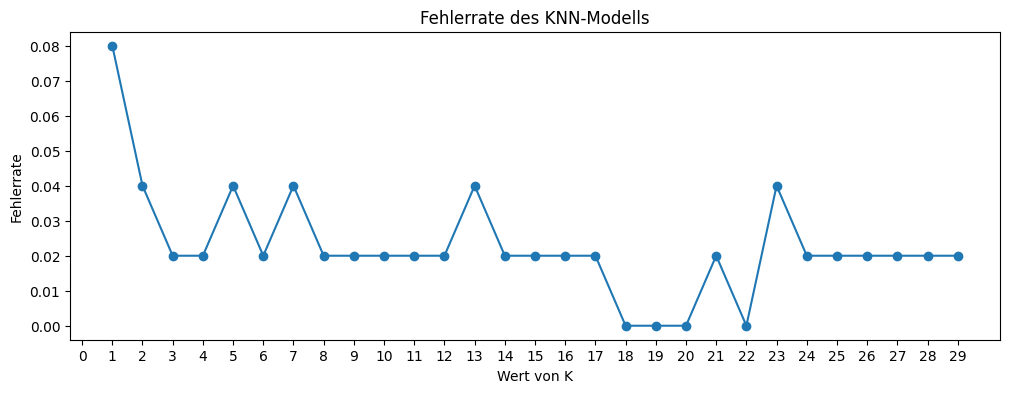

In [217]:
# Fehlerraten visualisieren und die besten sehen:
_, ax = plt.subplots(figsize=(12, 4))
ax.plot(range(1,30), error_rates, marker='o')
plt.title("Fehlerrate des KNN-Modells")
plt.xlabel("Wert von K")
plt.ylabel("Fehlerrate")
plt.xticks(np.arange(30))
plt.show()

In [204]:
# Die besten n mit for-Schleife rausholen:
for i, score in enumerate(error_rates):
    if score == min(error_rates):
        print('Minimum at:', i+1)

Minimum at: 18
Minimum at: 19
Minimum at: 20
Minimum at: 22


In [ ]:
# Dann lasst uns die Visualisierung für n=18 durchspielen!

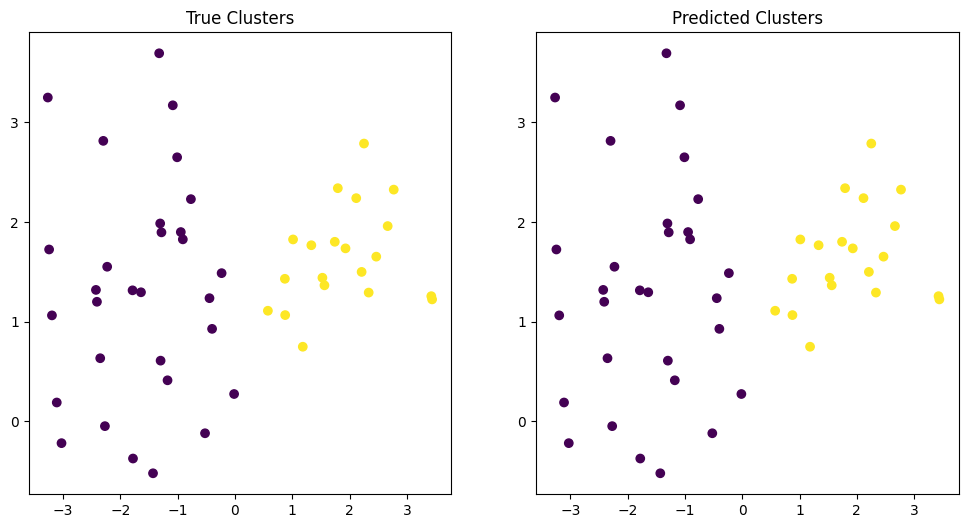

In [206]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_test)
ax1.set(title='True Clusters')
ax2.scatter(X_test[:, 0],
            X_test[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters');

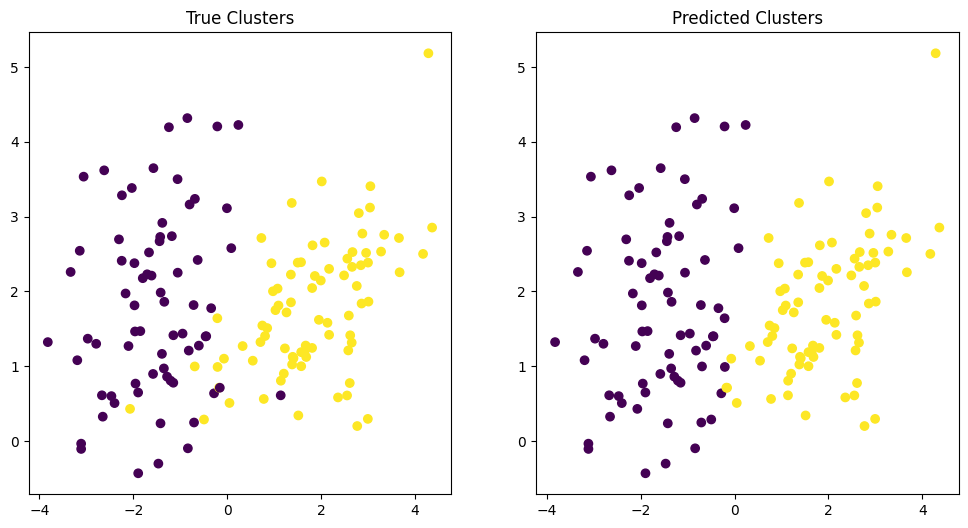

In [207]:
# Aber Vorsicht, das lag nur daran, dass Test so angenehm wenig Punkte hatte.
# Für die Trainingsdaten (mit viel mehr Punkten) sind die Cluster nicht ganz so perfekt.
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_train)
ax1.set(title='True Clusters')
ax2.scatter(X_train[:, 0],
            X_train[:, 1],
            c=y_pred)
ax2.set(title='Predicted Clusters');

# Jetzt wird es ernst: <br>Bestimmung der Gut-/Bösartigkeit von Tumoren

## Mit KNN: K-Nearest Neighbour (K-Nächste Nachbarn)

In [241]:
cancer = pd.read_csv('breast_cancer.csv', index_col='id')
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [262]:
# In der Spalte 'diagnosis' gibt es genau zwei Werte. 'M' und 'B'.
# Wir werden eine binäre Klassifikation durchführen, sodass das Modell neuen
# Datenpunkten 'M' oder 'B' zuordnet.
# Quizfrage: Wofür stehen diese Buchstaben eigentlich?
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [274]:
cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [242]:
na_overview = cancer.isna().sum()
na_overview

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [243]:
na_overview[na_overview != 0]

Unnamed: 32    569
dtype: int64

In [244]:
cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [245]:
X = cancer.select_dtypes('number')
y = cancer['diagnosis']

In [246]:
# Aufsplitten in Trainings-, Validierungs- und Testdaten
train_ratio = 0.8

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = train_ratio, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, random_state=0
)

In [561]:
# Bonusaufgabe für die, die später Lust haben:
# Schreibt eine Funktion train_val_test!

In [247]:
print(f"Anteil X_train am gesamten Datensatz: {X_train.shape[0]/X.shape[0]:.3f}.")

Anteil X_train am gesamten Datensatz: 0.800.


In [248]:
print(f"Anteil X_val am gesamten Datensatz: {X_val.shape[0]/X.shape[0]:.3f}.")

Anteil X_val am gesamten Datensatz: 0.100.


In [249]:
print(f"Anteil X_test am gesamten Datensatz: {X_test.shape[0]/X.shape[0]:.3f}.")

Anteil X_test am gesamten Datensatz: 0.100.


In [251]:
# Modell trainieren
knn_cancer = KNeighborsClassifier(n_neighbors=5)
knn_cancer.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [252]:
# Treffergenauigkeit (accuracy) bestimmen anhand des Testdatensatzes
# Sprich: Wie viele der Vorhersagen waren korrekt?
test_score1 = knn_cancer.score(X=X_test, y=y_test)
print(f'Test-Score ohne Parameter-Anpassung: {test_score1:.3f}' )

Test-Score ohne Parameter-Anpassung: 0.912


In [253]:
# Und wie gut war die Genauigkeit beim Trainingsdatensatz?
knn_cancer.score(X=X_train, y=y_train)

0.9494505494505494

In [ ]:
# Quizfrage: Ende gut alles gut?
# Ist unser Modell perfekt, um in der Medizin zum Einsatz zu kommen?
# Bemerkung: ...

In [256]:
# Übersicht über die verschiedenen (richtigen und falschen) Voraussagen 
# --> Confusion Matrix (zu Deutsch etwa: Matrix der Verwechslungen)
predictions = knn_cancer.predict(X=X_test)
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[30,  2],
       [ 3, 22]])

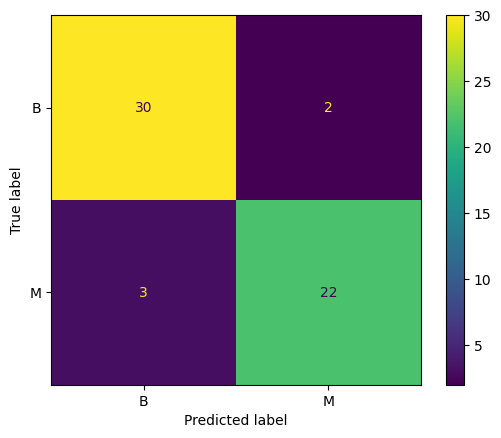

In [258]:
# Visuell ansprechender mit ConfusionMatrixDisplay:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, 
    y_pred=predictions,
)
plt.show()

In [271]:
# Accuracy (R²) – Anteil richtiger Vorhersagen an Gesamtheit)
accuracy = (30 + 22)/ len(y_test)
accuracy

0.9122807017543859

In [269]:
# Precision (Genauigkeit) – Anteil richtiger Positiver an richtig Positiven und falsch Positiven
# In unserem Fall:
# wirklich bösartige Tumoren / wirklich bösartige Tumoren + fälschlich als bösartig diagnostizierte gutartige Tumoren
precision_m = 22 / (22 + 2)
precision_m

0.9166666666666666

In [270]:
# Dasselbe für gutartige:
# wirklich gutartige Tumoren / wirklich gutartige Tumoren + fälschlich als gutartig diagnostizierte bösartige Tumoren
precision_b = 30 / (30 + 3)
precision_b

0.9090909090909091

In [276]:
# Recall (Sensitivität) – Anteil richtiger Positiver an richtig Positiven und falsch Negativen (eigentlich Tumoren)
recall_m = 22 / (22 + 3)
recall_m

0.88

In [277]:
recall_b = 30 / (30 + 2)
recall_b

0.9375

In [279]:
# f1-score – stellt das harmonische Mittel bei insbesondere unbalancierten Klassen her
f1_score_b = 2 * (precision_b*recall_b)/(precision_b + recall_b)
f1_score_b

0.923076923076923

In [280]:
f1_score_m = 2 * (precision_m*recall_m)/(precision_m + recall_m)
f1_score_m

0.8979591836734694

In [ ]:
# Was ist die wichtigste Metrik für Krebsspezialisten?
# Und auf was sollten wir unser Modell trimmen?

In [267]:
# Statt händisches Ausrechnen:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.91      0.94      0.92        32
           M       0.92      0.88      0.90        25

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57

